In [41]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [43]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [44]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [45]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [46]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [47]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6559f2371f448fbd66e33fb3a330054


In [48]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [49]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    


# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | berberati
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | brae
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | oranjestad
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | kerkini
Processing Record 11 of Set 1 | alofi
Processing Record 12 of Set 1 | olafsvik
Processing Record 13 of Set 1 | severo-kurilsk
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | bokspits
City not found. Skipping...
Processing Record 16 of Set 1 | mount gambier
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | nyurba
Processing R

Processing Record 41 of Set 4 | pangnirtung
Processing Record 42 of Set 4 | tiksi
Processing Record 43 of Set 4 | pandamatenga
Processing Record 44 of Set 4 | chuy
Processing Record 45 of Set 4 | ayni
Processing Record 46 of Set 4 | shimoda
Processing Record 47 of Set 4 | wanlaweyn
Processing Record 48 of Set 4 | baherden
Processing Record 49 of Set 4 | dawei
Processing Record 50 of Set 4 | mae sai
Processing Record 1 of Set 5 | dingle
Processing Record 2 of Set 5 | sao filipe
Processing Record 3 of Set 5 | norman wells
Processing Record 4 of Set 5 | port-gentil
Processing Record 5 of Set 5 | buala
Processing Record 6 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 5 | tanout
Processing Record 8 of Set 5 | valparaiso
Processing Record 9 of Set 5 | qui nhon
Processing Record 10 of Set 5 | acapulco
Processing Record 11 of Set 5 | rawannawi
City not found. Skipping...
Processing Record 12 of Set 5 | komsomolskiy
Processing Record 13 of Set 5 | barsovo
Processing

Processing Record 24 of Set 8 | skjervoy
Processing Record 25 of Set 8 | bella union
Processing Record 26 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 27 of Set 8 | dhrangadhra
Processing Record 28 of Set 8 | nelson bay
Processing Record 29 of Set 8 | krishnanagar
Processing Record 30 of Set 8 | victoria
Processing Record 31 of Set 8 | victoria point
Processing Record 32 of Set 8 | karakol
Processing Record 33 of Set 8 | katsiveli
City not found. Skipping...
Processing Record 34 of Set 8 | erenhot
Processing Record 35 of Set 8 | babusnica
Processing Record 36 of Set 8 | kiunga
Processing Record 37 of Set 8 | deblin
Processing Record 38 of Set 8 | bereda
Processing Record 39 of Set 8 | rudbar
Processing Record 40 of Set 8 | xiangdong
City not found. Skipping...
Processing Record 41 of Set 8 | vestmannaeyjar
Processing Record 42 of Set 8 | marsala
Processing Record 43 of Set 8 | arman
Processing Record 44 of Set 8 | guerrero negro
Processing Record 45 of Set 8 | high

Processing Record 8 of Set 12 | gazanjyk
Processing Record 9 of Set 12 | noumea
Processing Record 10 of Set 12 | comodoro rivadavia
Processing Record 11 of Set 12 | zaozerne
Processing Record 12 of Set 12 | wattegama
Processing Record 13 of Set 12 | san angelo
Processing Record 14 of Set 12 | linxia
Processing Record 15 of Set 12 | vite
Processing Record 16 of Set 12 | axim
Processing Record 17 of Set 12 | tutoia
Processing Record 18 of Set 12 | jasper
Processing Record 19 of Set 12 | laurel
Processing Record 20 of Set 12 | general pico
Processing Record 21 of Set 12 | ilheus
Processing Record 22 of Set 12 | jumla
Processing Record 23 of Set 12 | saint-francois
Processing Record 24 of Set 12 | ewa beach
Processing Record 25 of Set 12 | olindina
Processing Record 26 of Set 12 | tabou
Processing Record 27 of Set 12 | general roca
Processing Record 28 of Set 12 | la roda
Processing Record 29 of Set 12 | bocana de paiwas
Processing Record 30 of Set 12 | casper
Processing Record 31 of Set 1

In [59]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,44.60,65,75,10.36,CA,2021-08-13 21:57:23
1,Berberati,4.2612,15.7922,70.09,92,93,1.21,CF,2021-08-13 21:57:24
2,Khatanga,71.9667,102.5000,49.26,82,100,6.49,RU,2021-08-13 21:57:24
3,Brae,60.3964,-1.3530,57.11,85,97,4.79,GB,2021-08-13 21:57:24
4,Lebu,-37.6167,-73.6500,48.54,83,1,6.91,CL,2021-08-13 21:57:25
5,Ushuaia,-54.8000,-68.3000,37.06,87,75,16.11,AR,2021-08-13 21:57:25
6,Mataura,-46.1927,168.8643,46.47,90,80,9.62,NZ,2021-08-13 21:57:26
7,Oranjestad,12.5240,-70.0270,87.75,62,20,18.41,AW,2021-08-13 21:57:26
8,New Norfolk,-42.7826,147.0587,52.88,70,74,3.00,AU,2021-08-13 21:57:26
9,Kerkini,41.2167,23.0833,81.03,69,2,1.41,GR,2021-08-13 21:57:27


In [62]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2021-08-13 21:57:23,69.4541,-133.0374,44.60,65,75,10.36
1,Berberati,CF,2021-08-13 21:57:24,4.2612,15.7922,70.09,92,93,1.21
2,Khatanga,RU,2021-08-13 21:57:24,71.9667,102.5000,49.26,82,100,6.49
3,Brae,GB,2021-08-13 21:57:24,60.3964,-1.3530,57.11,85,97,4.79
4,Lebu,CL,2021-08-13 21:57:25,-37.6167,-73.6500,48.54,83,1,6.91
5,Ushuaia,AR,2021-08-13 21:57:25,-54.8000,-68.3000,37.06,87,75,16.11
6,Mataura,NZ,2021-08-13 21:57:26,-46.1927,168.8643,46.47,90,80,9.62
7,Oranjestad,AW,2021-08-13 21:57:26,12.5240,-70.0270,87.75,62,20,18.41
8,New Norfolk,AU,2021-08-13 21:57:26,-42.7826,147.0587,52.88,70,74,3.00
9,Kerkini,GR,2021-08-13 21:57:27,41.2167,23.0833,81.03,69,2,1.41


In [63]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [65]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

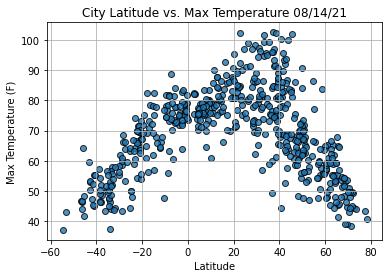

In [66]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

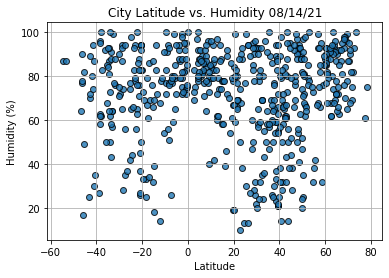

In [67]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

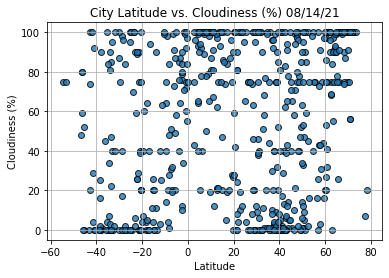

In [68]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()